In [ ]:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt

# **Data Import & Exploration**

### Datasets
We have 5 csv file

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv

**Reading  and Exploration of bookings data in a dataframe**

In [ ]:
df_bookings = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/fact_bookings.csv")
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [ ]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [ ]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [ ]:
df_bookings.booking_platform.value_counts()

,count
booking_platform,
others,55066
makeyourtrip,26898
logtrip,14756
direct online,13379
tripster,9630
journey,8106
direct offline,6755


Text(0, 0.5, 'Booking Platform')

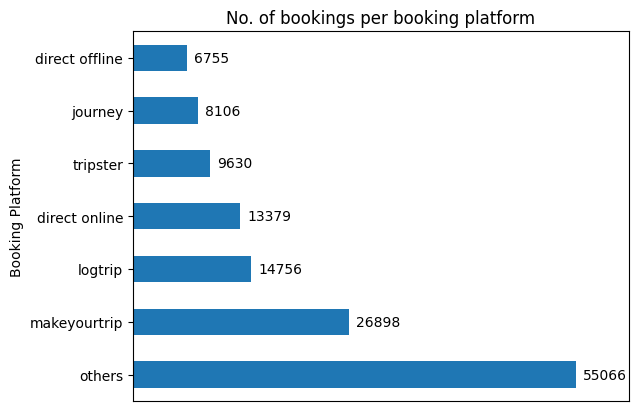

In [ ]:
ax = df_bookings.booking_platform.value_counts().plot(kind='barh')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f',padding=5)

max_value = df_bookings.booking_platform.value_counts().max()
xmin,xmax = ax.get_xlim()
new_limit = (max_value*0.07) + xmax
ax.set_xlim(xmin,new_limit)

ax.set_title('No. of bookings per booking platform')
# ax.set_xlabel('')
ax.get_xaxis().set_visible(False)
ax.set_ylabel('Booking Platform')



In [ ]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [ ]:
df_bookings.revenue_generated.max() , df_bookings.revenue_generated.min()


(28560000, 6500)

**Reading remaining files into separate dataframes**

In [ ]:
df_date = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/dim_date.csv")
df_hotel = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/dim_hotels.csv")
df_rooms = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/dim_rooms.csv")
df_agg_bookings = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/fact_aggregated_bookings.csv")

In [ ]:
df_hotel.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [ ]:
df_hotel.category.value_counts()

,count
category,
Luxury,16
Business,9


In [ ]:
df_hotel.city.value_counts().sort_values()

,count
city,
Delhi,5
Hyderabad,6
Bangalore,6
Mumbai,8


# **Data Cleaning**

**1. Clean invalid guests**


Below records shows all the invalid guest. Number of guests having less than zero values are data errors

In [ ]:
df_bookings[df_bookings["no_guests"]<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


Replacing the bookings dataframe with only valid guests

In [ ]:
df_bookings = df_bookings[df_bookings["no_guests"]>0]

**2. Outlier Removal**

Calculating mean and standard deviation

In [ ]:
mean , stddev =  df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

mean,stddev

(np.float64(15378.036937686695), 93040.15493143328)

Calculation of the limits using 3 standard deviation

In [ ]:
lower_limit = mean -  3*stddev
lower_limit

np.float64(-263742.4278566132)

In [ ]:
upper_limit = mean +  3*stddev
upper_limit

np.float64(294498.50173198653)

Removal of outliers based on revenue generated

In [ ]:
df_bookings[df_bookings["revenue_generated"]>upper_limit]


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [ ]:
df_bookings = df_bookings[df_bookings["revenue_generated"]<upper_limit]
df_bookings.shape

(134573, 12)

In [ ]:
df_bookings.revenue_realized.describe()

,revenue_realized
count,134573.000000
mean,12695.983585
std,6927.791692
min,2600.000000
25%,7600.000000
50%,11700.000000
75%,15300.000000
max,45220.000000


Using 3 standard deviation to calculate the limits & using the limits to remove outlier based on revenue realized.

In [ ]:
rev_realized_low_limit = df_bookings.revenue_realized.mean() - 3*df_bookings.revenue_realized.std()
rev_realized_low_limit

np.float64(-8087.391491610155)

In [ ]:
rev_realized_upper_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
rev_realized_upper_limit

np.float64(33479.3586618449)

In [ ]:
df_bookings[df_bookings.revenue_realized>rev_realized_upper_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [ ]:
df_bookings[df_bookings.revenue_realized>rev_realized_upper_limit].room_category.value_counts()

,count
room_category,
RT4,1299


From the above observation all the rooms are RT4 which is presidential suit. Since the cost of presendential suit is higher than other rooms, we have to make a further analysis on the revenue generated from RT4 rooms

In [ ]:
df_bookings[df_bookings["room_category"] == "RT4"].revenue_realized.mean() + 3*df_bookings[df_bookings["room_category"] == "RT4"].revenue_realized.std()


np.float64(50585.1056709996)

The upper limit of the revenue only from RT4 rooms is 50585. Since from our dataframe the maximum of revenue realized is 45220 which is within the upper limit of the revenue from RT4 rooms, hence there is no further cleaning required

In [ ]:
df_bookings.isnull().sum()

,0
booking_id,0
property_id,0
booking_date,0
check_in_date,0
checkout_date,0
no_guests,0
room_category,0
booking_platform,0
ratings_given,77897
booking_status,0


**3. Replacing null values in aggregate bookings dataframe**

In [ ]:
df_agg_bookings.isnull().sum()

,0
property_id,0
check_in_date,0
room_category,0
successful_bookings,0
capacity,2


In [ ]:
df_agg_bookings[df_agg_bookings.capacity.isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [ ]:
df_agg_bookings.fillna({"capacity":df_agg_bookings.capacity.median()},inplace =True)

In [ ]:
df_agg_bookings.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


Finding out records that have successful_bookings value greater than capacity

In [ ]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


# **DATA TRANSFORMATION**

**Creating Occupancy percentage column**

In [ ]:
df_agg_bookings['occ%'] =  df_agg_bookings.apply(lambda row: round((row['successful_bookings'] / row['capacity'])*100,2), axis=1)
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ%
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22
9196,16559,31-Jul-22,RT4,13,18.0,72.22
9197,17558,31-Jul-22,RT4,3,6.0,50.00
9198,19563,31-Jul-22,RT4,3,6.0,50.00


# **Insights Generation**

**1. What is the average occupancy rate in each of the room categories?**

In [ ]:
df_agg_bookings.groupby("room_category")["occ%"].mean().round(2)

,occ%
room_category,
RT1,58.23
RT2,58.04
RT3,58.03
RT4,59.30


In [ ]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


Merging rooms dataframe with aggregate bookings dataframe

In [ ]:
df_merge_agg_bookings = pd.merge(df_rooms,df_agg_bookings,left_on="room_id",right_on="room_category")
df_merge_agg_bookings.head()

,room_id,room_class,property_id,check_in_date,room_category,successful_bookings,capacity,occ%
0,RT1,Standard,16559,1-May-22,RT1,25,30.0,83.33
1,RT1,Standard,19562,1-May-22,RT1,28,30.0,93.33
2,RT1,Standard,19563,1-May-22,RT1,23,30.0,76.67
3,RT1,Standard,17558,1-May-22,RT1,30,19.0,157.89
4,RT1,Standard,16558,1-May-22,RT1,18,19.0,94.74


In [ ]:
df_merge_agg_bookings.groupby("room_class")["occ%"].mean().round(2)

,occ%
room_class,
Elite,58.04
Premium,58.03
Presidential,59.30
Standard,58.23


**2. What is the average occupancy rate per city?**

In [ ]:
df_hotel.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [ ]:
df_merge_agg_bookings = pd.merge(df_merge_agg_bookings,df_hotel,on="property_id")

In [ ]:
df_merge_agg_bookings.groupby("city")["occ%"].mean().round(2)

,occ%
city,
Bangalore,56.59
Delhi,61.61
Hyderabad,58.14
Mumbai,57.94


**3. When was the occupancy better? Weekday or Weekend?**

In [ ]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [ ]:
df_merge_agg_bookings = pd.merge(df_merge_agg_bookings,df_date,left_on="check_in_date",right_on="date")
df_merge_agg_bookings.head()

,room_id,room_class,property_id,check_in_date,room_category,successful_bookings,capacity,occ%,property_name,category,city,date,mmm yy,week no,day_type
0,RT1,Standard,18560,10-May-22,RT1,19,30.0,63.33,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
1,RT1,Standard,19562,10-May-22,RT1,18,30.0,60.00,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
2,RT1,Standard,19563,10-May-22,RT1,16,30.0,53.33,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
3,RT1,Standard,17558,10-May-22,RT1,11,19.0,57.89,Atliq Grands,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,RT1,Standard,16558,10-May-22,RT1,10,19.0,52.63,Atliq Grands,Luxury,Delhi,10-May-22,May 22,W 20,weekeday


In [ ]:
df_merge_agg_bookings.drop(columns = ["date","room_category"],axis=1, inplace =True )

In [ ]:
df_merge_agg_bookings.head()

,room_id,room_class,property_id,check_in_date,successful_bookings,capacity,occ%,property_name,category,city,mmm yy,week no,day_type
0,RT1,Standard,18560,10-May-22,19,30.0,63.33,Atliq City,Business,Hyderabad,May 22,W 20,weekeday
1,RT1,Standard,19562,10-May-22,18,30.0,60.00,Atliq Bay,Luxury,Bangalore,May 22,W 20,weekeday
2,RT1,Standard,19563,10-May-22,16,30.0,53.33,Atliq Palace,Business,Bangalore,May 22,W 20,weekeday
3,RT1,Standard,17558,10-May-22,11,19.0,57.89,Atliq Grands,Luxury,Mumbai,May 22,W 20,weekeday
4,RT1,Standard,16558,10-May-22,10,19.0,52.63,Atliq Grands,Luxury,Delhi,May 22,W 20,weekeday


Text(0, 0.5, 'Day Type')

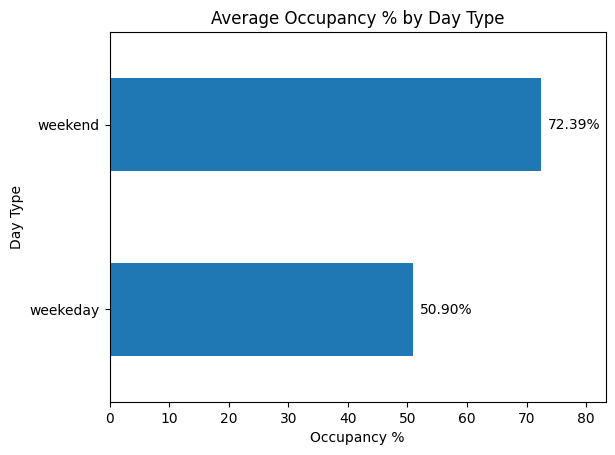

In [ ]:
ax=df_merge_agg_bookings.groupby("day_type")["occ%"].mean().round(2).plot(kind="barh")
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%',padding=5)


max_value = df_merge_agg_bookings.groupby("day_type")["occ%"].mean().round(2).max()
xmin,xmax = ax.get_xlim()
new_limit = (max_value*0.10) + xmax
ax.set_xlim(xmin,new_limit)

ax.set_title('Average Occupancy % by Day Type')
ax.set_xlabel('Occupancy %')
ax.set_ylabel('Day Type')


As we can see from the above chart occupancy rate was greater on weekends

**4. In the month of June what was the occupancy for different cities?**

In [ ]:
df_merge_agg_bookings["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [ ]:
df_merge_agg_bookings[df_merge_agg_bookings["mmm yy"]=="Jun 22"].groupby("city")["occ%"].mean().round(2).sort_values(ascending=False)


,occ%
city,
Delhi,62.47
Hyderabad,58.46
Mumbai,58.38
Bangalore,56.58


**5. Appending August month aggregate bookings data to existing data**

In [ ]:
df_Aug = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/new_data_august.csv")
df_Aug.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [ ]:
df_Aug.columns
df_Aug.shape

(7, 13)

In [ ]:
df_merge_agg_bookings.columns
df_merge_agg_bookings.shape

(6500, 13)

In [ ]:
df_merge_agg_bookings.rename(columns = {'room_id': "room_category"}, inplace =True)
df_merge_agg_bookings.head()

,room_category,room_class,property_id,check_in_date,successful_bookings,capacity,occ%,property_name,category,city,mmm yy,week no,day_type
0,RT1,Standard,18560,10-May-22,19,30.0,63.33,Atliq City,Business,Hyderabad,May 22,W 20,weekeday
1,RT1,Standard,19562,10-May-22,18,30.0,60.00,Atliq Bay,Luxury,Bangalore,May 22,W 20,weekeday
2,RT1,Standard,19563,10-May-22,16,30.0,53.33,Atliq Palace,Business,Bangalore,May 22,W 20,weekeday
3,RT1,Standard,17558,10-May-22,11,19.0,57.89,Atliq Grands,Luxury,Mumbai,May 22,W 20,weekeday
4,RT1,Standard,16558,10-May-22,10,19.0,52.63,Atliq Grands,Luxury,Delhi,May 22,W 20,weekeday


In [ ]:
latest_df= pd.concat([df_merge_agg_bookings,df_Aug], axis=0, ignore_index=True)
latest_df.tail(10)

,room_category,room_class,property_id,check_in_date,successful_bookings,capacity,occ%,property_name,category,city,mmm yy,week no,day_type
6497,RT4,Presidential,17558,31-Jul-22,3,6.0,50.00,Atliq Grands,Luxury,Mumbai,Jul 22,W 32,weekend
6498,RT4,Presidential,19563,31-Jul-22,3,6.0,50.00,Atliq Palace,Business,Bangalore,Jul 22,W 32,weekend
6499,RT4,Presidential,17561,31-Jul-22,3,4.0,75.00,Atliq Blu,Luxury,Mumbai,Jul 22,W 32,weekend
6500,RT1,Standard,16559,01-Aug-22,30,30.0,100.00,Atliq Exotica,Luxury,Mumbai,Aug-22,W 32,weekeday
6501,RT1,Standard,19562,01-Aug-22,21,30.0,70.00,Atliq Bay,Luxury,Bangalore,Aug-22,W 32,weekeday
6502,RT1,Standard,19563,01-Aug-22,23,30.0,76.67,Atliq Palace,Business,Bangalore,Aug-22,W 32,weekeday
6503,RT1,Standard,19558,01-Aug-22,30,40.0,75.00,Atliq Grands,Luxury,Bangalore,Aug-22,W 32,weekeday
6504,RT1,Standard,19560,01-Aug-22,20,26.0,76.92,Atliq City,Business,Bangalore,Aug-22,W 32,weekeday
6505,RT1,Standard,17561,01-Aug-22,18,26.0,69.23,Atliq Blu,Luxury,Mumbai,Aug-22,W 32,weekeday
6506,RT1,Standard,17564,01-Aug-22,10,16.0,62.50,Atliq Seasons,Business,Mumbai,Aug-22,W 32,weekeday


**6. Print revenue realized per city**

In [ ]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [ ]:
df_hotel.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [ ]:
df_merge_bookings = pd.merge(df_bookings,df_hotel,on="property_id")
df_merge_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [ ]:
df_merge_bookings.groupby("city")["revenue_realized"].sum()

,revenue_realized
city,
Bangalore,420383550
Delhi,294404488
Hyderabad,325179310
Mumbai,668569251


**7. Print month by month revenue**

In [ ]:
df_date.head()
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [ ]:
df_merge_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

Converting date columns from string to datetime format in bookings and date dataframe

In [ ]:
df_date["date"]= pd.to_datetime(df_date["date"])


/tmp/ipython-input-657-601453845.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"]= pd.to_datetime(df_date["date"])


In [ ]:
df_date['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 92 entries, 0 to 91
Series name: date
Non-Null Count  Dtype         
--------------  -----         
92 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 868.0 bytes


Normalizing the datetime format in bookings dataframe

In [ ]:
df_merge_bookings["check_in_date"] = df_merge_bookings["check_in_date"].str.replace('/','-',regex=False)

In [ ]:
df_merge_bookings["check_in_date"] = pd.to_datetime(df_merge_bookings["check_in_date"], dayfirst=True,format='mixed')

In [ ]:
df_merge_bookings["check_in_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 134573 entries, 0 to 134572
Series name: check_in_date
Non-Null Count   Dtype         
--------------   -----         
134573 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.0 MB


In [ ]:
df_merge_bookings= pd.merge(df_merge_bookings,df_date,left_on="check_in_date",right_on="date")

In [ ]:
df_merge_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
3,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
4,May012216558RT18,16558,26-04-22,2022-05-01,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [ ]:
df_merge_bookings.groupby('mmm yy')['revenue_realized'].sum()

,revenue_realized
mmm yy,
Jul 22,572843348
Jun 22,553925855
May 22,581767396


**8. Print revenue realized per hotel type**

In [ ]:
df_merge_bookings.groupby('category')["revenue_realized"].sum()

,revenue_realized
category,
Business,655967037
Luxury,1052569562


**9. Print average rating per city**

In [ ]:
df_merge_bookings.groupby("city")["ratings_given"].mean().round(2)

,ratings_given
city,
Bangalore,3.41
Delhi,3.78
Hyderabad,3.66
Mumbai,3.65


**10. Print a pie chart of revenue realized per booking platform**

In [ ]:
df_merge_bookings.groupby("booking_platform")["revenue_realized"].sum()

,revenue_realized
booking_platform,
direct offline,86374933
direct online,168948637
journey,102531334
logtrip,187494028
makeyourtrip,340814104
others,699306762
tripster,123066801


<Axes: ylabel='revenue_realized'>

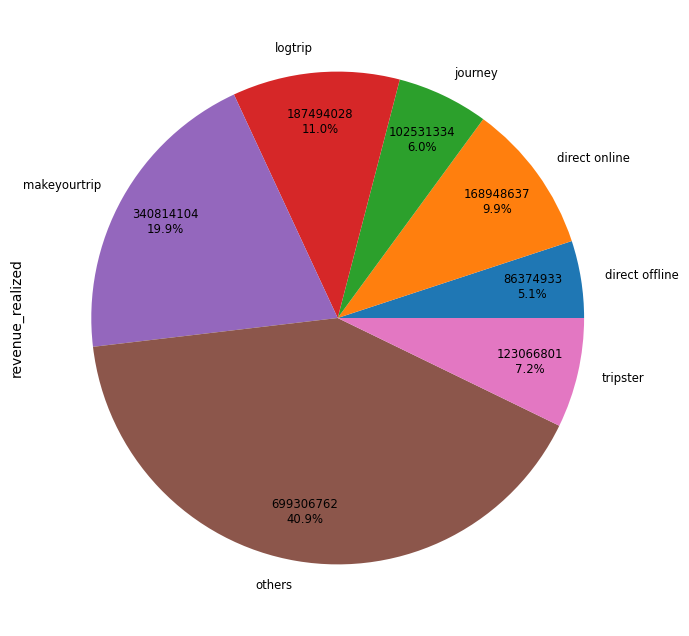

In [ ]:
group_by_paltform = df_merge_bookings.groupby("booking_platform")["revenue_realized"].sum()
index=[0]
def func(pct):
  abs = group_by_paltform.values[index[0]]
  index[0]+=1
  return f"{abs}\n{pct:.1f}%"

group_by_paltform.plot(kind='pie',autopct = func, pctdistance=0.8,figsize=(8, 8),textprops={'size': 'small'})

Adding the file to github


In [5]:
# 1. Import the necessary libraries
from getpass import getpass
import os
from google.colab import drive
drive.mount('/content/drive')

# 2. Configure your Git identity
!git config --global user.email "soham2753@gmail.com"
!git config --global user.name "S-R-HUB"

# 3. Define the repository and file names
REPO_NAME = "Data-Analysis-in-Hospitality-Domain-Using-Python"
FILE_NAME = "Hotels Analysis.ipynb"
REPO_PATH = f"/content/{REPO_NAME}"
FILE_PATH = "/content/drive/MyDrive/Colab Notebooks/Hotels Analysis.ipynb"

# 4. Clean up the environment from previous runs
# This step is crucial for re-running the cell
!rm -rf "{REPO_PATH}"

# 5. Clone the repository
!git clone https://github.com/S-R-HUB/Data-Analysis-in-Hospitality-Domain-Using-Python.git

# 6. Copy the notebook file into the cloned repository
# This ensures the original file remains in /content/
!cp "{FILE_PATH}" "{REPO_PATH}/"

# 7. Navigate into the repository directory
%cd "{REPO_PATH}"

# 8. Add, commit, and push the changes
!git add "{FILE_NAME}"
!git commit -m "Add Hotels Analysis notebook"

# 9. Authenticate with GitHub using a Personal Access Token (PAT)
token = getpass('Enter your GitHub Personal Access Token (PAT): ')
os.environ['GITHUB_TOKEN'] = token

# 10. Push the changes to the remote repository
!git push https://$GITHUB_TOKEN@github.com/S-R-HUB/Data-Analysis-in-Hospitality-Domain-Using-Python.git

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
fatal: Unable to read current working directory: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
fatal: Unable to read current working directory: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
fatal: could not create work tree dir 'Data-Analysis-in-Hospitality-Domain-Using-Python': No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
cp: cannot create regular